In [1]:
from sklearn import cluster, datasets

In [3]:
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [4]:
import matplotlib.pyplot as plt

In [17]:
n_samples=1500
X,y = datasets.make_moons(n_samples=n_samples, noise=0.05)

In [18]:
X=StandardScaler().fit_transform(X)

In [19]:
single=cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
kmeans=cluster.KMeans(2)

In [20]:
single.fit(X)
kmeans.fit(X);

In [21]:
import numpy as np

In [22]:
y1_pred=single.labels_.astype(np.int)
y2_pred=kmeans.predict(X)

Model 1 Silhouette score is 0.389562242276277
Model 2 Silhouette score is 0.4954969539796572
Model 1 Davies-Bouldin score is 1.0214432538294813
Model 1 Davies-Bouldin score is 0.8108538325559096


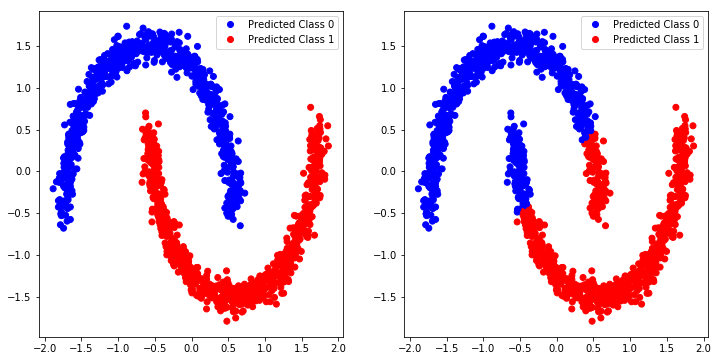

In [23]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
colors=np.array(['blue','red'])
legend_elems=[Line2D([0],[0], color=color, marker='o',linestyle='', label='Predicted Class {}'.format(i)) 
             for i, color in enumerate(colors)]

ax[0].scatter(X[:,0],X[:,1], color=colors[y1_pred])
ax[0].legend(handles=legend_elems, loc='upper right')
ax[1].scatter(X[:,0],X[:,1], color=colors[y2_pred])
ax[1].legend(handles=legend_elems, loc='upper right')

print('Model 1 Silhouette score is', silhouette_score(X,y1_pred))
print('Model 2 Silhouette score is', silhouette_score(X,y2_pred))
print('Model 1 Davies-Bouldin score is', davies_bouldin_score(X,y1_pred))
print('Model 1 Davies-Bouldin score is', davies_bouldin_score(X,y2_pred))

In [24]:
from yellowbrick.cluster import KElbowVisualizer

/usr/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
X,y=datasets.make_blobs(n_samples=n_samples)

In [30]:
?datasets.make_blobs

In [26]:
X=StandardScaler().fit_transform(X)

In [28]:
model=cluster.KMeans()

/home/Mauritian/.local/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/Mauritian/.local/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


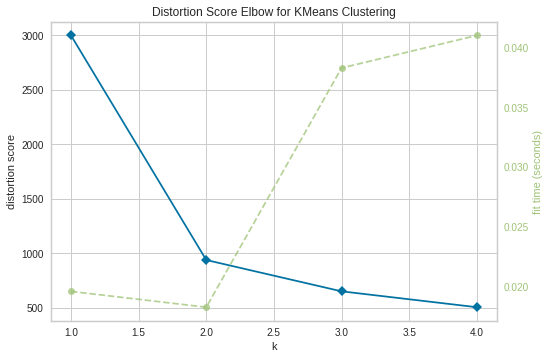

In [33]:
visualizer=KElbowVisualizer(model, k=(1,5))
visualizer.fit(X)
visualizer.poof()

In [34]:
import seaborn as sns

In [37]:
km=cluster.KMeans(2)
km.fit(X)
y_pred=km.predict(X)

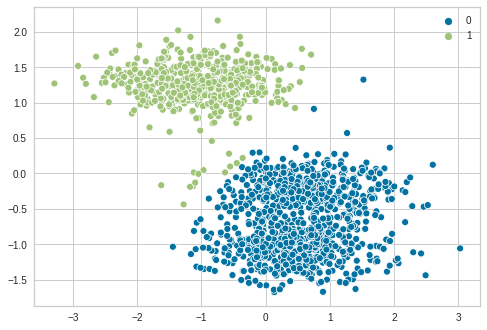

In [39]:
sns.scatterplot(X[:,0],X[:,1], hue=y_pred)

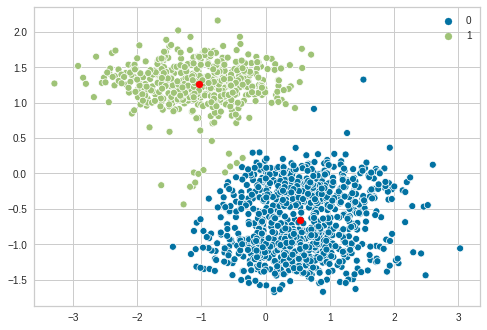

In [40]:
centers=km.cluster_centers_

sns.scatterplot(X[:,0],X[:,1], hue=y_pred)
plt.scatter(centers[:,0],centers[:,1], c='red')
plt.show()

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

In [46]:
X, _ = datasets.make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)

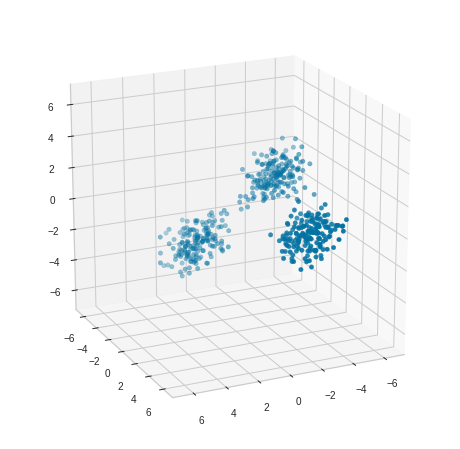

In [47]:
X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()

In [48]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X)
pca_X=pca.transform(X)

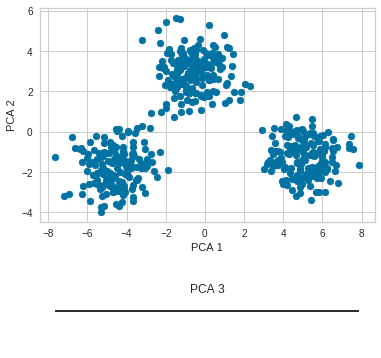

In [49]:
fig = plt.figure(figsize=(6, 6))
ax = [plt.subplot2grid((6, 1), (0, 0), rowspan=4), plt.subplot2grid((6, 1), (5, 0))]

ax[0].scatter(pca_X[:, 0], pca_X[:, 1])
ax[0].set_xlabel("PCA 1")
ax[0].set_ylabel("PCA 2")

ax[1].set_title('PCA 3', pad=-5)
ax[1].hlines(1, -7, 10)
y = np.ones(X.shape[0])
ax[1].plot(pca_X[:, 2], y, '|', ms='20')
ax[1].axis('off')

plt.show()

# Image Transformation

In [54]:
import matplotlib.image as mpimg
img=mpimg.imread('/home/Mauritian/Documents/Documents/GitHub/My own labs/mlcourse.ai/img/cv2-12.jpg')[...,1]

In [56]:
img1=mpimg.imread('/home/Mauritian/Documents/Documents/GitHub/My own labs/mlcourse.ai/img/cv2-12.jpg')
img1.shape

(525, 700, 3)

In [57]:
img.shape

(525, 700)

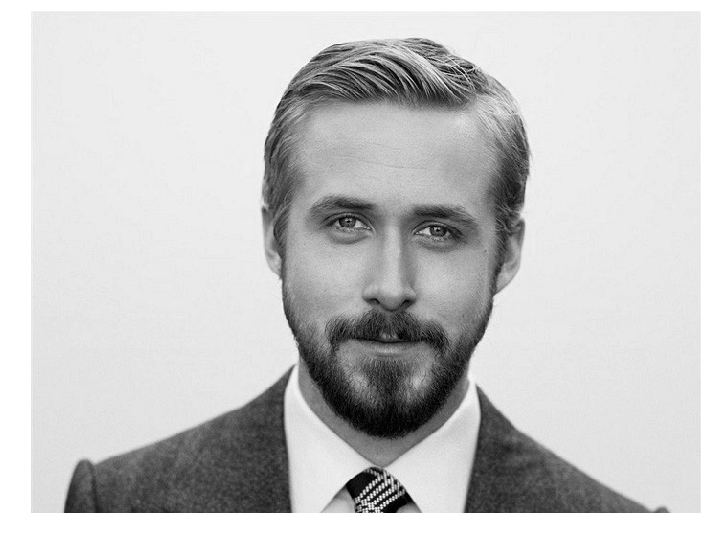

In [60]:
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(img,cmap='gray')

In [61]:
X=img.reshape((-1,1))
print(img.shape)
print(X.shape)

(525, 700)
(367500, 1)


In [64]:
mkm=cluster.MiniBatchKMeans(n_clusters=3)
mkm.fit(X)
values=mkm.cluster_centers_
labels=mkm.labels_

In [65]:
img_compressed=values[labels].reshape(img.shape)

In [66]:
img_compressed.shape

(525, 700)

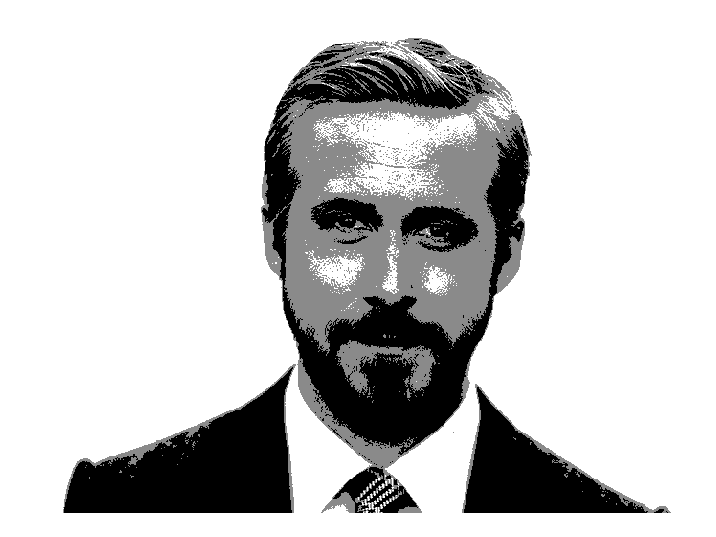

In [69]:
plt.figure(figsize=(12,18))
plt.axis('off')
plt.imshow(img_compressed,cmap='gray')

# Keywords detection

In [70]:
categories=['comp.graphics', 'talk.politics.guns','sci.space','rec.sport.hockey']

In [71]:
dataset=datasets.fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [73]:
print(len(dataset.data))
print(len(dataset.target_names))

3869
4


In [74]:
labels=dataset.target
true_k=np.unique(labels).shape[0]
true_k

4

In [75]:
dataset.data[0]

'From: v111qheg@ubvmsb.cc.buffalo.edu (P.VASILION)\nSubject: Re: WACO burning\nOrganization: University at Buffalo\nLines: 25\nNews-Software: VAX/VMS VNEWS 1.41\nNntp-Posting-Host: ubvmsb.cc.buffalo.edu\n\nIn article <C5v15A.7oo@dscomsa.desy.de>, hallam@zeus02.desy.de writes...\n[... snip ...]\n\n>|>>Has anyone in U.S. heard anything similar or are U.S. government\n>|>>spin-doctors censoring such information?\n>|>>\n>|>>The B.B.C. news is also reporting that about 20 of those that died\n>|>>were british citizens.\n> \n>The B.B.C. are also reporting that bodies of B-D members were found\n>with bullet wounds in a manner that suggests they may have been shot\n>attempting to leave the compound during the fire.\n> \n>There is a possibility that these are the bodies of people killed during\n>the initial shootout.\n> \n>Phill Hallam-Baker\n\nCan you imagine what happens when a magazine explodes? Bullets go flying every\nwhere. IMHO, these "gunshot wounds" were actually caused when the magazin

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [77]:
vector=TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2, stop_words='english')
X=vector.fit_transform(dataset.data)
print('n_samples:', X.shape[0], ',n_features:',X.shape[1])

n_samples: 3869 ,n_features: 1000


In [78]:
km=cluster.KMeans(n_clusters=true_k)

In [79]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
print(silhouette_score(X,km.labels_))

0.019337512144120134


In [84]:
terms=vector.get_feature_names()
for i in range(true_k):
    print(f'cluster {i+1}:')
    for ind in km.cluster_centers_.argsort()[:,::-1][i,:10]:
        print(f'{terms[ind]}', end=' ')
    print()

cluster 1:
com gun people fbi stratus guns government atf don batf 
cluster 2:
game ca hockey team nhl games play espn players university 
cluster 3:
graphics com university thanks posting image host nntp ac computer 
cluster 4:
space nasa henry access gov digex alaska pat shuttle toronto 


In [86]:
import pandas as pd
text_df=pd.DataFrame(dataset.data,columns=['text'])
text_df['true']=dataset.target
text_df['cluster']=km.labels_

In [87]:
text_df.head()

,text,true,cluster
0,From: v111qheg@ubvmsb.cc.buffalo.edu (P.VASILI...,3,0
1,From: Minh Lang <minh@inst-sun1.jpl.nasa.gov>\...,3,3
2,From: schumach@convex.com (Richard A. Schumach...,2,2
3,From: glp@phillson.cray.com (Gordon Phillips)\...,0,2
4,From: willis@oracle.SCG.HAC.COM (Stan Willis)\...,1,1


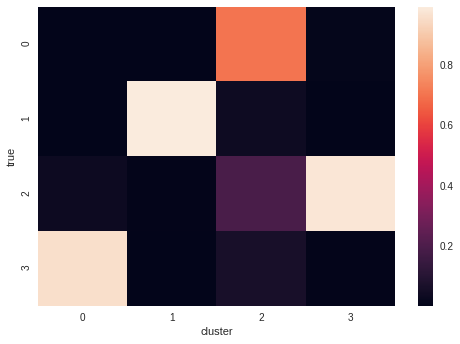

In [88]:
sns.heatmap(pd.crosstab(text_df.true, text_df.cluster,normalize='columns'))

In [89]:
dataset.target_names

['comp.graphics', 'rec.sport.hockey', 'sci.space', 'talk.politics.guns']

# Classification/Clusterizaton

In [90]:
digits=datasets.load_digits()

In [91]:
X,y=digits.data, digits.target

In [92]:
kmeans=cluster.KMeans(10)

In [94]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
kmeans.labels_

array([9, 4, 4, ..., 4, 0, 0], dtype=int32)

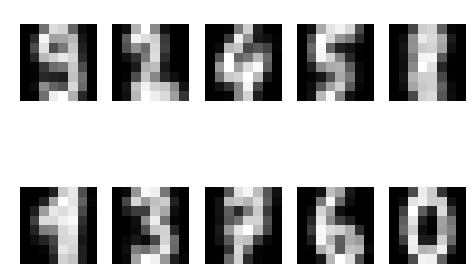

In [96]:
fig, axes=plt.subplots(2,5)
for ax,center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8,8),cmap='gray')
    ax.axis('off')

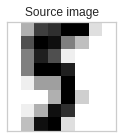

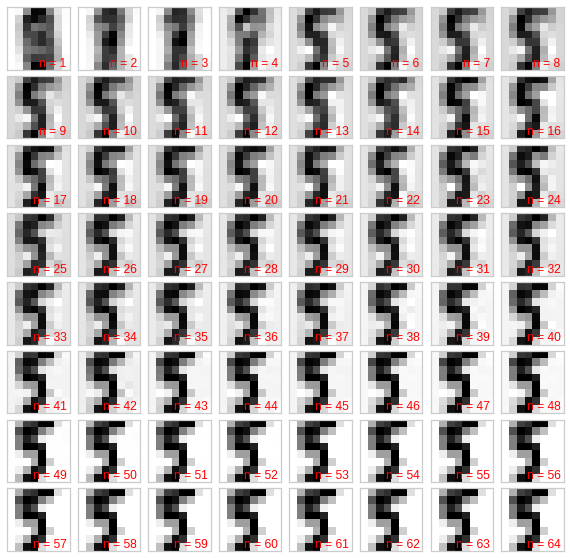

In [102]:
plt.figure(figsize=(4,2))
plt.imshow(X[15].reshape((8, 8)), cmap='binary')
plt.xticks([])
plt.yticks([])
plt.title('Source image')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[15].reshape(1, -1)))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([])
    ax.set_yticks([])

In [109]:
comp=pd.DataFrame([kmeans.labels_,y], index=['cluster','actual']).T
comp.cluster.value_counts()


0    247
4    227
7    202
8    182
9    179
6    177
1    175
2    166
3    150
5     92
Name: cluster, dtype: int64

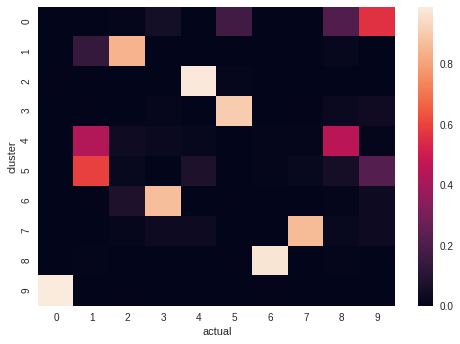

In [114]:
sns.heatmap(pd.crosstab(comp.cluster,comp.actual, normalize='index'))